## Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Online_Retail.csv", encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Step 2: Data Cleaning and Preprocessing

In [7]:
df = df.dropna(subset=['CustomerID','Description'])

In [9]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/tmp/ipython-input-1442424268.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [11]:
# Create Revenue column
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
df.shape

(397884, 9)

## Step 3: GroupBy Analysis

In [14]:
# A) Revenue by Country
country_rev = df.groupby('Country')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
country_rev.head(25)

,Country,Amount
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


In [52]:
# B) Top 20 Products by Revenue
product_rev = df.groupby('Description')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(20)
product_rev

,Description,Amount
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142592.95
3698,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
1762,JUMBO BAG RED RETROSPOT,85220.78
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
2611,POSTAGE,77803.96
2345,PARTY BUNTING,68844.33
216,ASSORTED COLOUR BIRD ORNAMENT,56580.34
2130,Manual,53779.93
2656,RABBIT NIGHT LIGHT,51346.20


In [64]:
# C) Top 20 Products by Quantity Sold
product_qty = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(20)
product_qty

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2269,PACK OF 72 RETROSPOT CAKE CASES,33693
2600,POPCORN HOLDER,30931
2656,RABBIT NIGHT LIGHT,27202
2047,MINI PAINT SET VINTAGE,26076


In [63]:
# D) Monthly Sales Trend
monthly_sales = df.set_index('InvoiceDate').resample('M')['Amount'].sum().reset_index()
monthly_sales

/tmp/ipython-input-51773188.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['Amount'].sum().reset_index()


,InvoiceDate,Amount
0,2010-12-31,572713.890
1,2011-01-31,569445.040
2,2011-02-28,447137.350
3,2011-03-31,595500.760
4,2011-04-30,469200.361
5,2011-05-31,678594.560
6,2011-06-30,661213.690
7,2011-07-31,600091.011
8,2011-08-31,645343.900
9,2011-09-30,952838.382


## Step 4: Optional Product Master Table and Merge

In [55]:
product_master = df[['StockCode','Description','UnitPrice']].drop_duplicates().set_index('StockCode')
df_merged = df.merge(product_master, on='StockCode', how='left')
df_merged.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice_x,CustomerID,Country,Amount,Description_y,UnitPrice_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,WHITE HANGING HEART T-LIGHT HOLDER,2.95
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,WHITE HANGING HEART T-LIGHT HOLDER,3.24
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,WHITE HANGING HEART T-LIGHT HOLDER,2.40
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,WHITE HANGING HEART T-LIGHT HOLDER,3.20


In [56]:
product_master.head()

,Description,UnitPrice
StockCode,,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
71053,WHITE METAL LANTERN,3.39
84406B,CREAM CUPID HEARTS COAT HANGER,2.75
84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


## Step 5: Visualizations

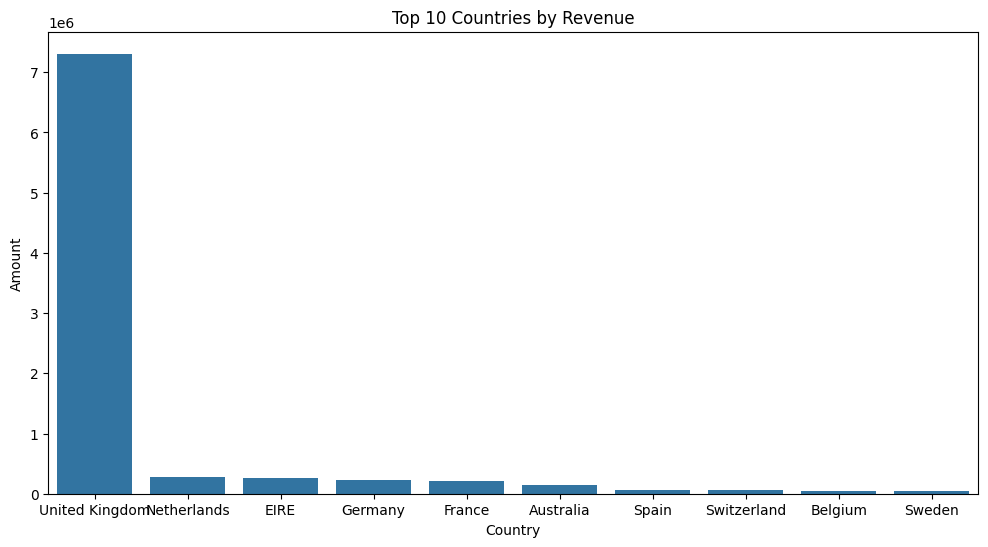

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='Amount', data=country_rev.head(10))
plt.title('Top 10 Countries by Revenue')
plt.show()

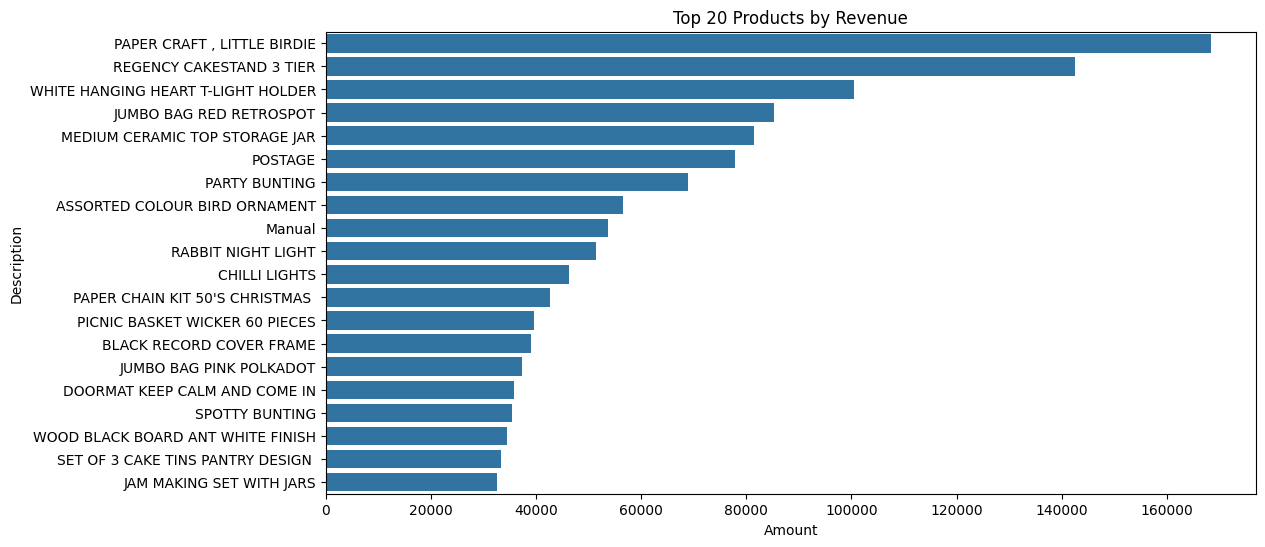

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x='Amount', y='Description', data=product_rev)
plt.title('Top 20 Products by Revenue')
plt.show()

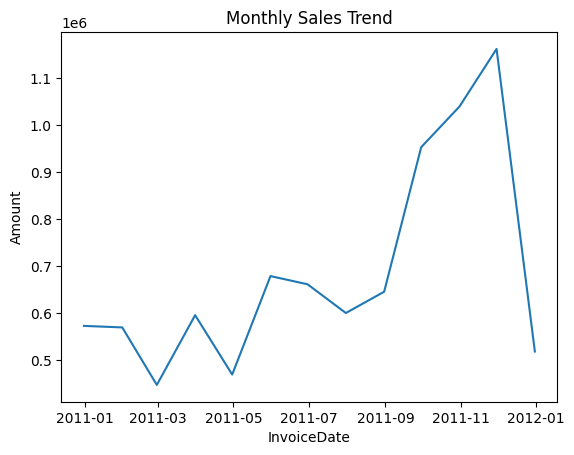

In [59]:
sns.lineplot(x='InvoiceDate', y='Amount', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.show()